In [97]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [98]:
import numpy as np
import pandas as pd

In [99]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [100]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [101]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [102]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)
Base

sqlalchemy.ext.automap.Base

In [103]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [104]:
# Save references to each table


Measurement = Base.classes.measurement



station = Base.classes.station
station


sqlalchemy.ext.automap.station

In [105]:
# Create our session (link) from Python to the DB

session = Session(engine)
session

In [106]:
 # Bring in tables and inspector engine
    
from sqlalchemy import inspect

inspector = inspect(engine)

for table_name in inspector.get_table_names():
   for column in inspector.get_columns('Measurement'):
       print("Column: %s" % column['name'], column["type"])

Column: id INTEGER
Column: station TEXT
Column: date TEXT
Column: prcp FLOAT
Column: tobs FLOAT
Column: id INTEGER
Column: station TEXT
Column: date TEXT
Column: prcp FLOAT
Column: tobs FLOAT


In [107]:
for table_name in inspector.get_table_names():
   for column in inspector.get_columns('station'):
       print("Column: %s" % column['name'], column["type"])

Column: id INTEGER
Column: station TEXT
Column: name TEXT
Column: latitude FLOAT
Column: longitude FLOAT
Column: elevation FLOAT
Column: id INTEGER
Column: station TEXT
Column: name TEXT
Column: latitude FLOAT
Column: longitude FLOAT
Column: elevation FLOAT


In [108]:
# Using engine.execute to display first 20 rows of Measurement table'

engine.execute('select * from Measurement').fetchmany(size=20)

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

In [109]:
# Using engine.execute to display first 20 rows of station table'

engine.execute('select * from station').fetchmany(size=20)

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [110]:
#first date of the Measurement table


session.query(Measurement.date).order_by(Measurement.date.desc()).first()
first_date

# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


('2010-01-01')

In [111]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


session.query(Measurement.date).order_by(Measurement.date.desc()).first() 

last_date

('2017-08-23')

In [112]:
# Calculate the date 1 year ago from the last data point in the database

from datetime import datetime, timedelta

date_one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

date_one_year_ago

datetime.date(2016, 8, 23)

In [113]:
# Perform a query to retrieve the data and precipitation scores

scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_one_year_ago)
scores

In [114]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(scores, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [115]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by = 'date')
prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


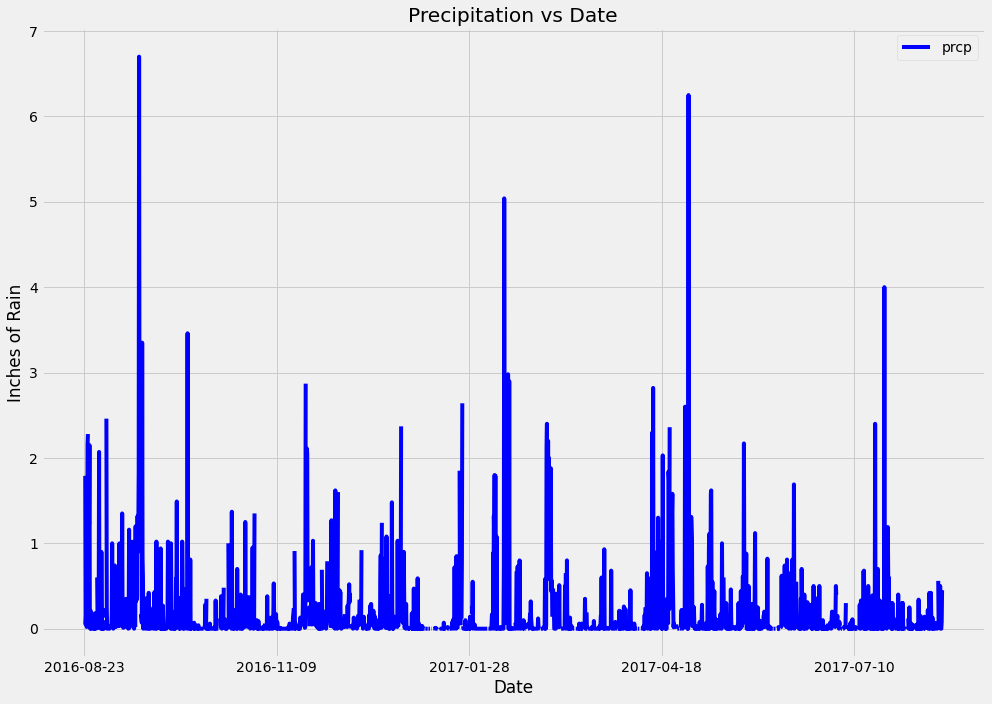

In [116]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(title="Precipitation vs Date", color = 'blue', figsize = (14,10))
plt.ylabel("Inches of Rain")
plt.xlabel("Date")
plt.tight_layout()
plt.xticks()
plt.savefig("Images/fig1")
plt.show()

In [117]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [118]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [119]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
totals = session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).all()
totals.sort(key=lambda x: x[1], reverse=True)
totals


[('USC00516128', 1068.0899999999956),
 ('USC00519281', 588.6399999999976),
 ('USC00513117', 382.61999999999847),
 ('USC00519523', 295.67999999999944),
 ('USC00514830', 234.49000000000026),
 ('USC00519397', 131.62000000000063),
 ('USC00511918', 92.68000000000006),
 ('USC00518838', 70.87000000000005),
 ('USC00517948', 43.44000000000002)]

In [120]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Most active Station

most_active_station = station_count_desc[0][0]
most_active_station

'USC00519281'

In [121]:
# lowest temperature record for most active station
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
lowest_temperature

[(54.0)]

In [122]:
# highest temperature record for most active station
highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
highest_temperature

[(85.0)]

In [123]:
# Calculate averange temperature record for most active station
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
avg_temp

[(71.66378066378067)]

In [124]:
# Choose the station with the highest number of temperature observations.


highest_tob_station = session.query(Measurement.station, func.count(Measurement.tobs))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.tobs).desc()).first()[0]

highest_tob_station

'USC00519281'

In [125]:
highest_tob_station_all = session.query(Measurement.station, func.count(Measurement.tobs)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).all()
highest_tob_station_all

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [126]:
# Query the last 12 months of temperature observation data for this station 
one_year_ago_tob_data = session.query(Measurement.date, Measurement.station, Measurement.tobs)\
                        .filter(Measurement.station == 'USC00519281')\
                        .filter(Measurement.date >= date_one_year_ago).all()
one_year_ago_tob_data

[('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-1

In [127]:
# Create a dataframe to plot 

one_year_ago_tob_data_df = pd.DataFrame(one_year_ago_tob_data, columns=['date', 'tobs', 'temp'])
one_year_ago_tob_data_df.set_index('date', inplace=True)
one_year_ago_tob_data_df

,tobs,temp
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0
...,...,...
2017-08-14,USC00519281,77.0
2017-08-15,USC00519281,77.0
2017-08-16,USC00519281,76.0


In [128]:
one_year_ago_tob_data_df.head()

,tobs,temp
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


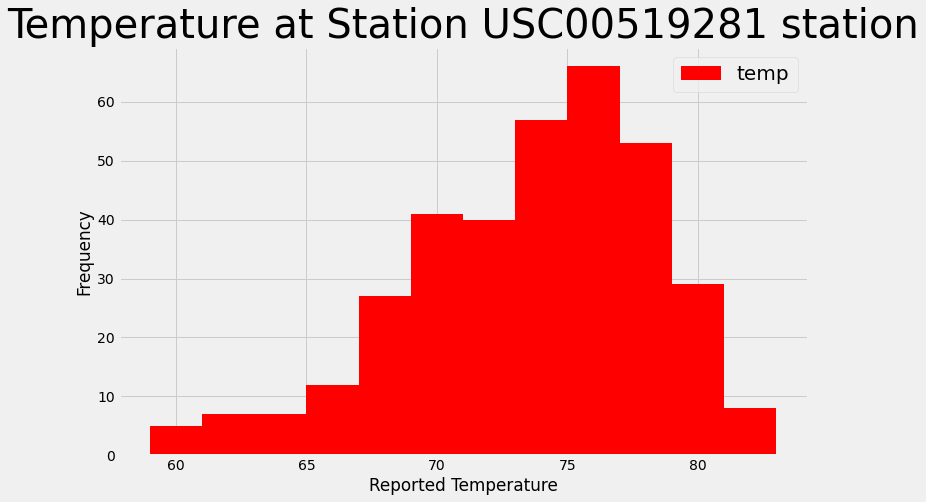

In [129]:
# Plot Histrogram

one_year_ago_tob_data_df_histrogram = one_year_ago_tob_data_df.plot(kind='hist', bins=12, figsize=(11,7), color = 'redorange')
plt.xlabel('Reported Temperature')
plt.title('Temperature at Station USC00519281 station', fontsize=40)
plt.legend(bbox_to_anchor=(1,1), fontsize=20)
plt.savefig("Images/fig2")
plt.show()

## Bonus Challenge Assignment

In [130]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [131]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp = calc_temps('2016-08-23', '2017-08-23')
temp[0][1]

74.59058295964125

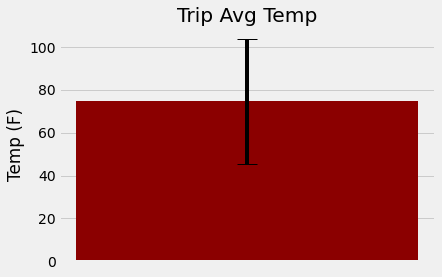

In [132]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = temp[0][2] - temp[0][0]
plt.bar(1, temp[0][1], yerr = yerr, color="darkred", alpha = 1.0, capsize=10)
plt.xticks([])
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.savefig("Images/fig3")
plt.show()

In [133]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


station_data = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
station_s = pd.DataFrame(station_data)

station_s = station_s.set_index('station')
station_s = station_s.reindex(index=station_list)
station_s = station_s.reset_index()
station_s


,station,name,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
